In [87]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from collections import OrderedDict


In [88]:
dams_with_upstream_dams = OrderedDict([
    ('Barkley_Dam', 'Barkley'),
    ('Old_Hickory_Dam', 'Old Hickory'),
    ('Cordell_Hull_Dam' , 'Cordell Hull'),
    ('Wolf_Creek', 'Wolf Creek')
])

In [89]:
fn = Path("/tiger1/pdas47/resorr-swot/results/resorr-swot-stats/weekly.csv")
df = pd.read_csv(fn)
df

,reservoir_id,with_or_without_resorr,reservoir_name,metric,metric_value
0,0,with resorr,Barkley_Dam,NSE,-1.568398e-01
1,0,without resorr,Barkley_Dam,NSE,-7.820439e-01
2,0,with resorr,Barkley_Dam,MAE,2.780954e+08
3,0,without resorr,Barkley_Dam,MAE,3.127699e+08
4,0,with resorr,Barkley_Dam,RMSE,4.908992e+08
5,0,without resorr,Barkley_Dam,RMSE,6.092772e+08
6,0,with resorr,Barkley_Dam,KGE,4.858464e-01
7,0,without resorr,Barkley_Dam,KGE,1.660768e-01
8,0,with resorr,Barkley_Dam,rsquared,4.601396e-01
9,0,without resorr,Barkley_Dam,rsquared,5.037244e-01


In [90]:
df['metric'].unique()

array(['NSE', 'MAE', 'RMSE', 'KGE', 'rsquared', 'spearman_r'],
      dtype=object)

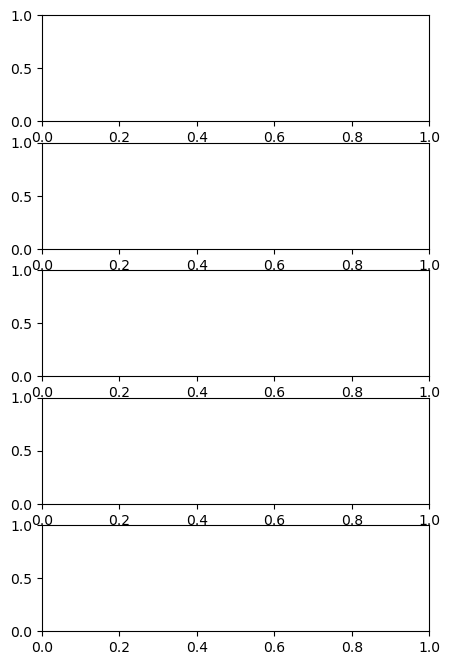

In [91]:
fig, axes = plt.subplots(nrows=5, figsize=[5, 8])

/tmp/ipykernel_80663/2892011586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


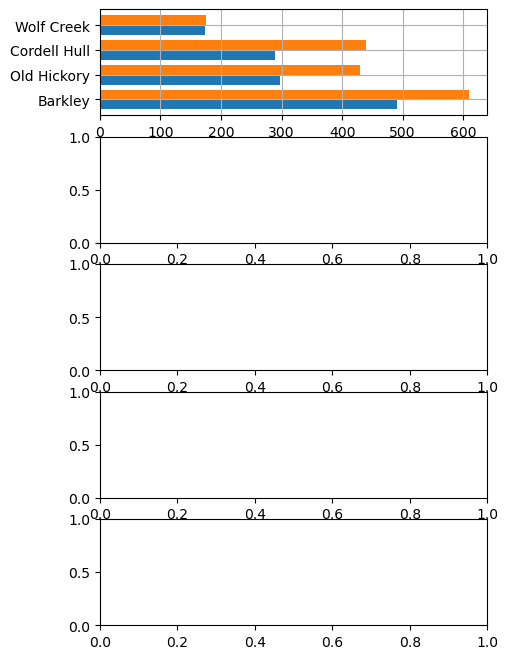

In [92]:
METRIC = 'RMSE'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")

df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None
df_pivot = df_pivot * 1e-6 # convert to mil. m3

df_pivot.plot(kind="barh", ax=axes[0], width=0.8)
axes[0].set_title(None)
axes[0].set_xlabel(f'{METRIC} (mil. m$^3$ per week)')
axes[0].grid()
legend = axes[0].legend()
legend.remove()
axes[0]
fig

/tmp/ipykernel_80663/784415423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


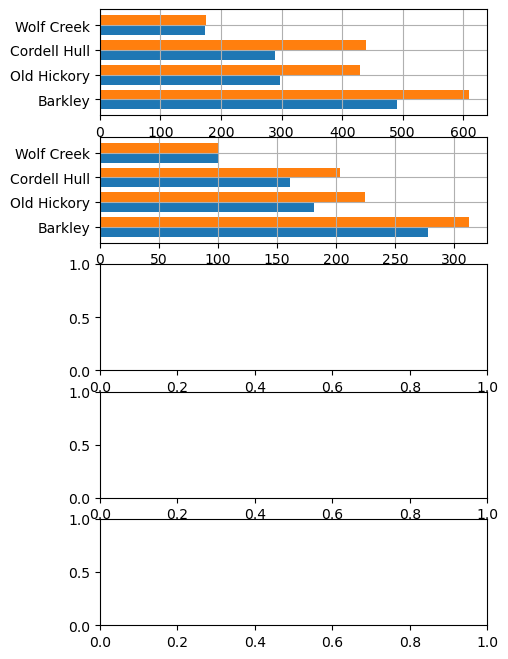

In [93]:
METRIC = 'MAE'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None
df_pivot = df_pivot * 1e-6

df_pivot.plot(kind="barh", ax=axes[1], width=0.8)
axes[1].set_title(None)
axes[1].set_xlabel(f'{METRIC} (mil. m$^3$ per week)')
axes[1].grid()
legend = axes[1].legend()
legend.remove()
axes[1]
fig

/tmp/ipykernel_80663/2157951968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


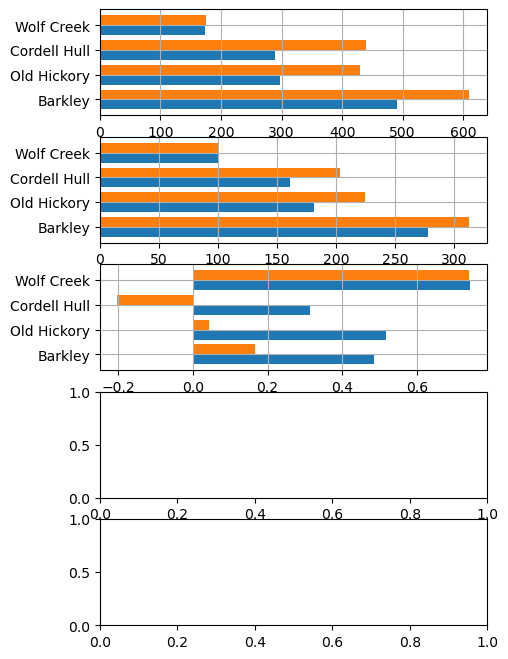

In [94]:
METRIC = 'KGE'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[2], width=0.8)
axes[2].set_title(None)
axes[2].set_xlabel(f'{METRIC}')
axes[2].grid()
legend = axes[2].legend()
legend.remove()
fig

/tmp/ipykernel_80663/604814856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


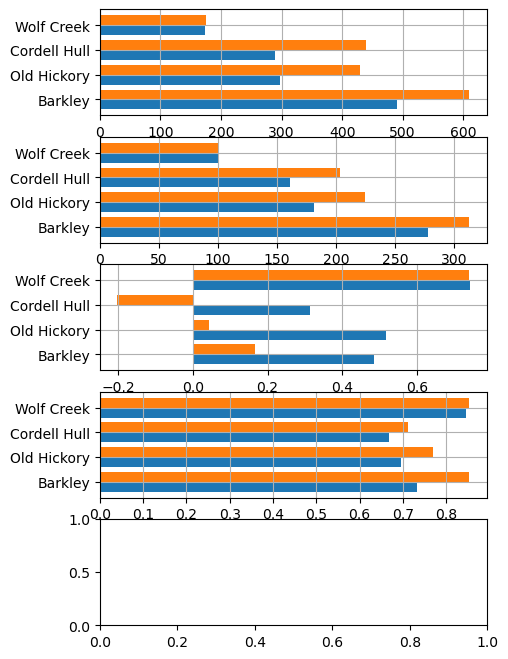

In [95]:
METRIC = 'spearman_r'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[3], width=0.8)
axes[3].set_title(None)
axes[3].set_xlabel(f'{METRIC}')
axes[3].grid()
legend = axes[3].legend()
legend.remove()
fig

/tmp/ipykernel_80663/1694693166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


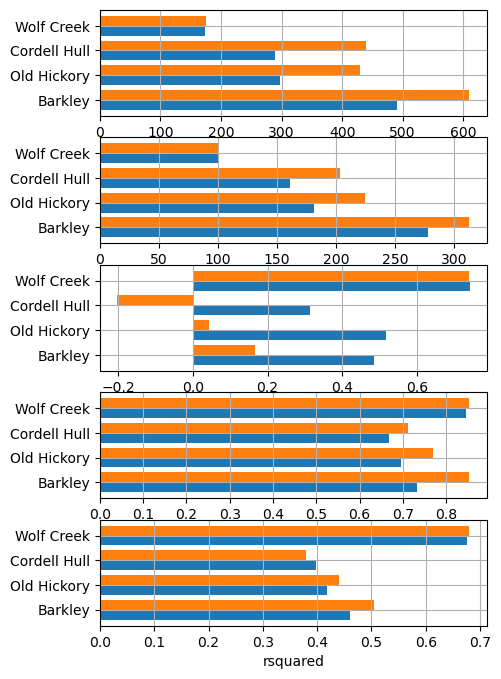

In [96]:
METRIC = 'rsquared'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[4], width=0.8)
axes[4].set_title(None)
axes[4].set_xlabel(f'{METRIC}')
axes[4].grid()
legend = axes[4].legend()
legend.remove()
fig

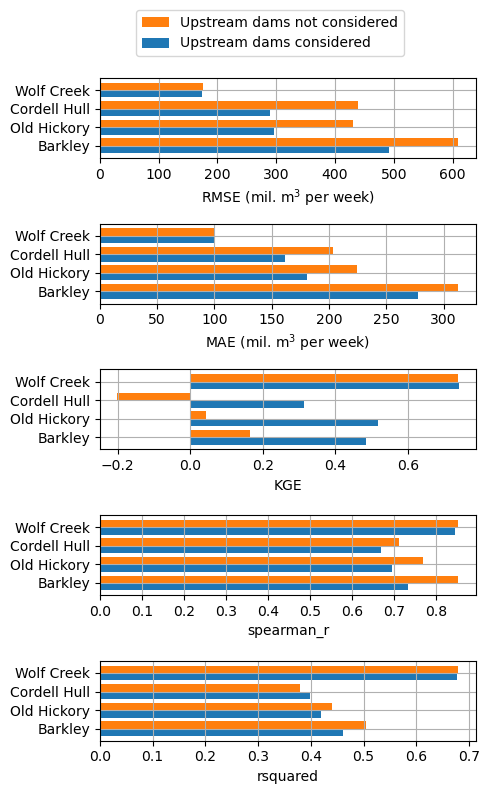

In [97]:
handles, labels = axes[0].get_legend_handles_labels()
# handles = handles[:2]
# labels = labels[:2]

fl = fig.legend(handles=handles[::-1], labels=labels[::-1], loc='lower center', ncols=1, bbox_to_anchor=[0.55, 0.92])
# fl.set_title("Upstream dams")

fig.tight_layout(rect=[0, 0, 1, 0.92])
fig

In [98]:
# fig.savefig(
#     Path(f'/tiger1/pdas47/resorr-swot/results/resorr-swot-stats/monthly-metrics.png'), dpi=900
# )
# fig.savefig(
#     Path(f'/tiger1/pdas47/resorr-swot/results/resorr-swot-stats/monthly-metrics.svg')
# )

## Scatter plots -- Observed vs. Modeled    

In [99]:
import geopandas as gpd

RESERVOIRS_GDF = gpd.read_file("/tiger1/pdas47/resorr-swot/data/cumberland-reservoirs/03-cumberland-reservoirs.geojson")
RESERVOIRS_GDF

,name,area,id,GRAND_ID,RES_NAME,DAM_NAME,ALT_NAME,RIVER,ALT_RIVER,MAIN_BASIN,...,TIMELINE,COMMENTS,URL,QUALITY,EDITOR,LONG_DD,LAT_DD,POLY_SRC,insitu_db,geometry
0,Barkley_Dam,174.088555,0,1752.0,Lake Barkley,Barkley Dam,None,Cumberland,None,None,...,None,None,http://www.lrn.usace.army.mil/op/bar/rec/,2: Good,UNH,-88.218748,37.018747,UY,rise,"POLYGON ((-87.96708 36.70382, -87.96708 36.704..."
1,Laurel_Dam,22.158193,1,1754.0,Laurel Lake,Laurel Dam,None,Laurel,None,None,...,None,None,http://www.lrn.usace.army.mil/op/lau/rec/,2: Good,UNH,-84.267474,36.959995,SWBD,rise,"POLYGON ((-84.19981 37.01885, -84.19954 37.018..."
2,Wolf_Creek,171.725214,2,1756.0,Lake Cumberland,Wolf Creek,None,Cumberland,None,None,...,None,None,http://www.lrn.usace.army.mil/op/wol/rec/,2: Good,UNH,-85.143750,36.867817,SWBD,rise,"POLYGON ((-84.92502 36.8329, -84.92502 36.8331..."
3,Dale_Hollow_Dam,99.055547,3,1762.0,Dale Hollow Lake,Dale Hollow Dam,None,Obey River,None,None,...,None,None,http://www.lrn.usace.army.mil/op/DAL/rec/,3: Fair,UNH,-85.450254,36.538312,SWBD,rise,"POLYGON ((-85.20206 36.49442, -85.20314 36.494..."
4,Old_Hickory_Dam,64.016795,4,1768.0,Old Hickory Lake,Old Hickory Dam,None,Cumberland River,None,None,...,None,None,http://www.lrn.usace.army.mil/op/old/rec/,2: Good,UNH,-86.658869,36.291890,SWBD,rise,"POLYGON ((-86.40158 36.30523, -86.40158 36.305..."
5,J._Percy_Priest_Dam,54.881626,5,NaN,None,None,None,None,None,None,...,None,None,None,None,None,NaN,NaN,None,rise,"POLYGON ((-86.61071 36.16267, -86.61044 36.162..."
6,Center_Hill_Dam,65.563102,6,1777.0,Center Hill Lake,Center Hill Dam,None,Caney Fork River,None,None,...,None,None,http://www.lrn.usace.army.mil/op/cen/rec/,2: Good,UNH,-85.825580,36.096527,SWBD,rise,"POLYGON ((-85.62005 36.03331, -85.62005 36.033..."
7,Great_Falls,3.048935,7,1787.0,Great Falls Lake,Great Falls,None,Caney Fork River,None,None,...,None,None,http://lakeinfo.tva.gov/htbin/lakeinfo?site=GF...,2: Good,UNH,-85.621457,35.801042,SWBD,rise,"POLYGON ((-85.58124 35.80748, -85.58097 35.807..."
8,Cordell_Hull_Dam,36.557880,8,7318.0,Cordell Hull Lake,Cordell Hull Dam,Cordell Hull Lake,Cumberland River,None,Mississippi,...,None,None,https://en.wikipedia.org/wiki/Cordell_Hull_Lake,2: Good,McGill-PB,-85.944131,36.292220,JRC,rise,"POLYGON ((-85.70116 36.34997, -85.70116 36.349..."


In [100]:
def get_insitu_observed_data(
        id, 
        RESERVOIRS_GDF, 
        src_dir = Path('/tiger1/pdas47/resorr-swot/data/insitu/resops')
    ):
    row = RESERVOIRS_GDF[RESERVOIRS_GDF['id'] == id]
    name = row['name'].values[0]
    src_dir = Path(src_dir)
    src = src_dir.name

    if src == 'resops':
        src_fn = src_dir / f'{name}.csv'
        insitu_df = pd.read_csv(src_fn)
    elif src =='usace':
        name_without_dam = name.replace('_Dam', '')
        elevation_src_fn = src_dir / f'{name_without_dam}-elevation'
        inflow_src_fn = src_dir / f'{name_without_dam}-inflow'
        outflow_src_fn = src_dir / f'{name_without_dam}-outflow'
        storage_src_fn = src_dir / f'{name_without_dam}-storage'

        elevation_df = pd.read_csv(elevation_src_fn, comment='#', names=['time', 'elevation'], index_col=0)
        elevation_df.index = pd.to_datetime(elevation_df.index)
        inflow_df = pd.read_csv(inflow_src_fn, comment='#', names=['time', 'inflow'], index_col=0)
        inflow_df.index = pd.to_datetime(inflow_df.index)
        outflow_df = pd.read_csv(outflow_src_fn, comment='#', names=['time', 'outflow'], index_col=0)
        outflow_df.index = pd.to_datetime(outflow_df.index)
        storage_df = pd.read_csv(storage_src_fn, comment='#', names=['time', 'storage'], index_col=0)
        storage_df.index = pd.to_datetime(storage_df.index)

        insitu_df = pd.concat([elevation_df, inflow_df, outflow_df, storage_df], axis=1)
        # insitu data is in hourly time format
        insitu_df = insitu_df.resample('1D').median()
        # convert from imperial to SI
        insitu_df['elevation'] = insitu_df['elevation'] * 0.3048
        insitu_df['inflow'] = insitu_df['inflow'] * 0.028316847 # m3/s
        insitu_df['outflow'] = insitu_df['outflow'] * 0.028316847
        insitu_df['storage'] = insitu_df['storage'] * 1233.48


    return insitu_df

def get_aggregated_observed(
    reservoir_id,
    RESERVOIRS_GDF,
    freq,
    start, end,
    src_dir=Path('/tiger1/pdas47/resorr-swot/data/insitu/usace')
):
    # read raw observed (daily/hourly depending on source)
    observed_df = get_insitu_observed_data(reservoir_id, RESERVOIRS_GDF, src_dir)
    observed_df.index = pd.to_datetime(observed_df.index)

    # make slice bounds timezone-aware if observed_df index is tz-aware
    if getattr(observed_df.index, "tz", None) is not None:
        start = start.tz_localize(observed_df.index.tz)
        end = end.tz_localize(observed_df.index.tz)

    observed_df = observed_df[observed_df.index >= start]
    observed_df = observed_df[observed_df.index <= end]

    # convert flows from m3/s to m3/day
    observed = observed_df.copy()
    if 'inflow' in observed.columns:
        observed['inflow'] = observed['inflow'] * 60 * 60 * 24
    if 'outflow' in observed.columns:
        observed['outflow'] = observed['outflow'] * 60 * 60 * 24

    observed = observed.resample(freq).aggregate({
        'inflow': 'sum', 'outflow': 'sum',
        'elevation': 'median', 'storage': 'median'
    })

    return observed

In [101]:
data = pd.read_csv("/tiger1/pdas47/resorr-swot/data/regulation-outputs/weekly.csv")
data

,node,time,inflow,outflow,regulated_runoff,natural_runoff,theoretical_natural_runoff,storage,storage_change,regulation,elevation,dt,reservoir_id,date,reservoir
0,0,2023-09-13,2.729234e+08,3.128529e+08,2.522348e+08,2.068866e+07,3.779442e+07,7.261089e+08,-3.992952e+07,-2.351290e+08,107.75889,7.0,0,2023-09-13,Barkley_Dam
1,0,2023-09-20,1.368380e+08,1.381129e+08,1.267398e+08,1.009821e+07,1.694753e+07,7.248340e+08,-1.274899e+06,-1.198905e+08,NaN,7.0,0,2023-09-20,Barkley_Dam
2,0,2023-09-27,2.278082e+08,2.281800e+08,1.783379e+08,4.947027e+07,1.321533e+08,7.244621e+08,-3.718688e+05,-9.565488e+07,107.62679,7.0,0,2023-09-27,Barkley_Dam
3,0,2023-10-04,2.137235e+08,2.137235e+08,1.320245e+08,8.169902e+07,1.162430e+08,7.244621e+08,0.000000e+00,-9.748055e+07,107.69435,7.0,0,2023-10-04,Barkley_Dam
4,0,2023-10-11,1.404572e+08,1.404572e+08,1.153190e+08,2.513824e+07,4.597301e+07,7.244621e+08,0.000000e+00,-9.448419e+07,NaN,7.0,0,2023-10-11,Barkley_Dam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,8,2025-05-14,2.073369e+08,2.080354e+08,2.123786e+08,-5.041716e+06,2.045049e+08,2.926487e+08,-6.984934e+05,-2.831987e+06,153.04056,7.0,8,2025-05-14,Cordell_Hull_Dam
732,8,2025-05-21,3.260528e+08,3.230080e+08,2.824294e+08,4.362334e+07,3.349812e+08,2.956935e+08,3.044833e+06,8.928465e+06,153.10751,7.0,8,2025-05-21,Cordell_Hull_Dam
733,8,2025-05-28,4.183507e+08,4.206726e+08,3.908444e+08,2.750625e+07,3.012187e+08,2.933716e+08,-2.321941e+06,-1.171320e+08,NaN,7.0,8,2025-05-28,Cordell_Hull_Dam
734,8,2025-06-04,3.664869e+08,3.688088e+08,3.459052e+08,2.058161e+07,1.783375e+08,2.910497e+08,-2.321941e+06,-1.881494e+08,153.00540,7.0,8,2025-06-04,Cordell_Hull_Dam


In [102]:
obs_dfs = []
for node in data['node'].unique():
    start_time = pd.to_datetime(data[data['node']==node]['time'].min())
    end_time = pd.to_datetime(data[data['node']==node]['time'].max())
    print(f'{node = }, {start_time = }, {end_time = }')
    obs_df = get_aggregated_observed(
        node, RESERVOIRS_GDF, '7d', start_time, end_time
    )
    obs_df['node'] = node
    obs_dfs.append(obs_df)
obs_dfs = pd.concat(obs_dfs)

node = np.int64(0), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')


node = np.int64(1), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')
node = np.int64(2), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')
node = np.int64(3), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')
node = np.int64(4), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')
node = np.int64(5), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')
node = np.int64(6), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')
node = np.int64(8), start_time = Timestamp('2023-09-13 00:00:00'), end_time = Timestamp('2025-06-11 00:00:00')


In [103]:
obs_reset = obs_dfs.reset_index()
obs_reset['time'] = pd.to_datetime(obs_reset['time'])

data_with_obs = pd.merge(
    data.assign(time=pd.to_datetime(data['time'], utc=True)),
    obs_reset,
    on=['time', 'node'],
    how='left',
    suffixes=('', '_obs')
)
data_with_obs = data_with_obs[data_with_obs['reservoir'].isin(dams_with_upstream_dams.keys())]
data_with_obs

,node,time,inflow,outflow,regulated_runoff,natural_runoff,theoretical_natural_runoff,storage,storage_change,regulation,elevation,dt,reservoir_id,date,reservoir,inflow_obs,outflow_obs,elevation_obs,storage_obs
0,0,2023-09-13 00:00:00+00:00,2.729234e+08,3.128529e+08,2.522348e+08,2.068866e+07,3.779442e+07,7.261089e+08,-3.992952e+07,-2.351290e+08,107.75889,7.0,0,2023-09-13,Barkley_Dam,1.078963e+08,1.078963e+08,108.480,8.644225e+08
1,0,2023-09-20 00:00:00+00:00,1.368380e+08,1.381129e+08,1.267398e+08,1.009821e+07,1.694753e+07,7.248340e+08,-1.274899e+06,-1.198905e+08,NaN,7.0,0,2023-09-20,Barkley_Dam,1.377432e+08,1.379886e+08,108.300,8.277734e+08
2,0,2023-09-27 00:00:00+00:00,2.278082e+08,2.281800e+08,1.783379e+08,4.947027e+07,1.321533e+08,7.244621e+08,-3.718688e+05,-9.565488e+07,107.62679,7.0,0,2023-09-27,Barkley_Dam,3.180531e+08,2.950551e+08,108.250,8.187820e+08
3,0,2023-10-04 00:00:00+00:00,2.137235e+08,2.137235e+08,1.320245e+08,8.169902e+07,1.162430e+08,7.244621e+08,0.000000e+00,-9.748055e+07,107.69435,7.0,0,2023-10-04,Barkley_Dam,2.003737e+08,2.236162e+08,108.220,8.127878e+08
4,0,2023-10-11 00:00:00+00:00,1.404572e+08,1.404572e+08,1.153190e+08,2.513824e+07,4.597301e+07,7.244621e+08,0.000000e+00,-9.448419e+07,NaN,7.0,0,2023-10-11,Barkley_Dam,1.529107e+08,1.527885e+08,108.250,8.187820e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,8,2025-05-14 00:00:00+00:00,2.073369e+08,2.080354e+08,2.123786e+08,-5.041716e+06,2.045049e+08,2.926487e+08,-6.984934e+05,-2.831987e+06,153.04056,7.0,8,2025-05-14,Cordell_Hull_Dam,3.778933e+08,3.896415e+08,153.500,3.139143e+08
732,8,2025-05-21 00:00:00+00:00,3.260528e+08,3.230080e+08,2.824294e+08,4.362334e+07,3.349812e+08,2.956935e+08,3.044833e+06,8.928465e+06,153.10751,7.0,8,2025-05-21,Cordell_Hull_Dam,4.752614e+08,4.974683e+08,153.625,3.199200e+08
733,8,2025-05-28 00:00:00+00:00,4.183507e+08,4.206726e+08,3.908444e+08,2.750625e+07,3.012187e+08,2.933716e+08,-2.321941e+06,-1.171320e+08,NaN,7.0,8,2025-05-28,Cordell_Hull_Dam,4.008731e+08,3.894860e+08,153.675,3.225401e+08
734,8,2025-06-04 00:00:00+00:00,3.664869e+08,3.688088e+08,3.459052e+08,2.058161e+07,1.783375e+08,2.910497e+08,-2.321941e+06,-1.881494e+08,153.00540,7.0,8,2025-06-04,Cordell_Hull_Dam,1.913173e+08,1.656513e+08,153.580,3.179379e+08


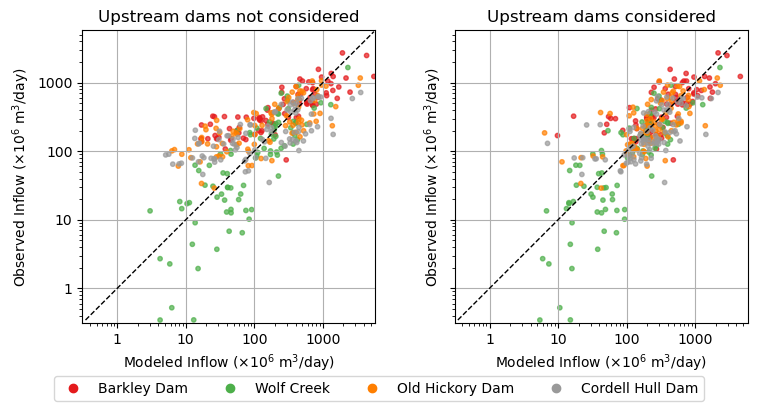

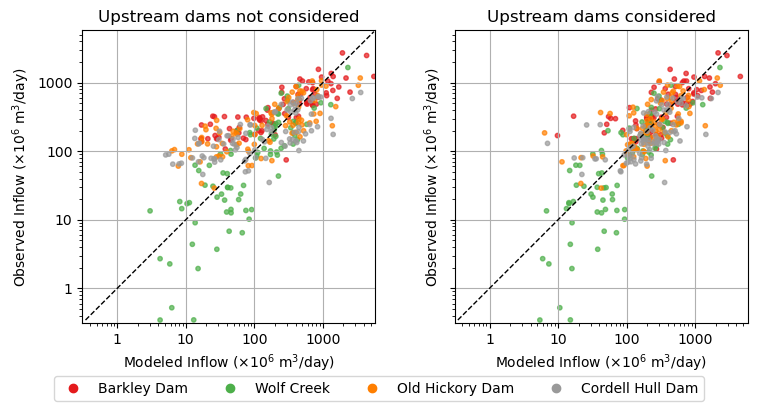

In [109]:
import numpy as np
import matplotlib as mpl

fig, axes = plt.subplots(ncols=2, figsize=(8,4), sharey=True, sharex=True)

pairs = [
    ('theoretical_natural_runoff', 'Upstream dams not considered'),
    ('inflow', 'Upstream dams considered'),
]

# prepare a consistent colormap mapping for node IDs (used for scatter and legend)
nodes_all = sorted(data_with_obs['node'].unique())
cmap = plt.get_cmap('Set1')
norm = plt.Normalize(vmin=min(nodes_all), vmax=max(nodes_all))

for ax, (xcol, title) in zip(axes, pairs):
    d = data_with_obs[[xcol, 'inflow_obs', 'node']].dropna()
    x = d[xcol].values * 1e-6
    y = d['inflow_obs'].values * 1e-6

    sc = ax.scatter(x, y, s=10, alpha=0.7, c=d['node'], cmap=cmap, norm=norm)

    # 1:1 line: use positive values only (log scale can't handle <=0)
    pos_mask = (x > 0) & (y > 0)
    if pos_mask.any():
        # Plot 1:1 line using positive data extent (but do NOT change the view limits)
        line_min = min(np.min(x[pos_mask]), np.min(y[pos_mask]))
        line_max = max(np.max(x[pos_mask]), np.max(y[pos_mask]))
        ax.plot([line_min, line_max], [line_min, line_max], color='k', linestyle='--', linewidth=1)

        # Preserve current view (limits from the scatter)
        x_lims = ax.get_xlim()
        y_lims = ax.get_ylim()

        # When switching to log scale, limits must be positive. Prepare safe lower bounds:
        if x_lims[0] <= 0:
            x_low_safe = line_min * 0.9
        else:
            x_low_safe = x_lims[0]
        if y_lims[0] <= 0:
            y_low_safe = line_min * 0.9
        else:
            y_low_safe = y_lims[0]

        # Switch to log scales but restore the (possibly adjusted) original view
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(x_low_safe, x_lims[1])
        ax.set_ylim(y_low_safe, y_lims[1])

    # Labels / title / style
    ax.set_xlabel(r'Modeled Inflow ($\times$10$^6$ m$^3$/day)')
    ax.set_ylabel(r'Observed Inflow ($\times$10$^6$ m$^3$/day)')
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')
    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
    ax.grid(True)

# build legend handles (map node -> reservoir name for labels)
handles = [
    plt.Line2D([0], [0], marker='o', color=cmap(norm(n)), linestyle='', markersize=6)
    for n in nodes_all
]
labels = [
    data_with_obs.loc[data_with_obs['node'] == n, 'reservoir'].unique()[0].replace('_', ' ')
    for n in nodes_all
]

# place legend below the subplots
fig.legend(handles=handles, labels=labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0))
fig.tight_layout(rect=[0, 0.08, 1, 1])
fig

In [110]:
fig.savefig(f"/tiger1/pdas47/resorr-swot/results/figures/scatter.weekly.png", dpi=1200)